In [63]:
import pandas as pd
import scipy.stats as stats
%matplotlib inline

In [64]:
dir = '../resources/data/'
# from Kaggle https://www.kaggle.com/neuromusic/avocado-prices
filename = 'avocado.csv' 

In [65]:
df = pd.read_csv(dir + filename)

In [66]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

**Column Definitions**
* Date - The date of the observation
* AveragePrice - the average price of a single avocado
* type - conventional or organic
* year - the year
* Region - the city or region of the observation
* Total Volume - Total number of avocados sold
* 4046 - Total number of avocados with PLU 4046 sold
* 4225 - Total number of avocados with PLU 4225 sold
* 4770 - Total number of avocados with PLU 4770 sold


In [67]:
df.head(5000)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.00,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.00,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.00,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.00,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.00,conventional,2015,Albany


**Question 1**: Take a look at the **region** column and the values in it. Choosing 2 of the values in **region** along with **Total Volume**, can you form a hypothesis around the mean's of the samples? (hint: you will need to use Welch's t-Test)

**Question 1a**: What is your hypothesis?

In [68]:
#Hypothesis: CincinnatiDayton consumes more Total Volume of avacados compared to Albany.
#Null Hypothesis: The region and Total Volume of avacados have no statistical significance.

**Question 1b**: What is your solution using Welch's t-Test? Print the t-value, p-value and degrees of freedom

In [69]:
city1 = df[(df['region'] == 'CincinnatiDayton')]
city1_volume = city1['Total Volume']
city2 = df[(df['region'] == 'Albany')]
city2_volume = city2['Total Volume']

In [70]:
t, p = stats.ttest_ind(city1_volume, city2_volume, equal_var = False)

In [71]:
def degrees_of_freedom(x, y):
    return (x.var()/x.shape[0] + y.var()/y.shape[0])**2 / ((x.var()/x.shape[0])**2 / (x.shape[0]-1) + (y.var()/y.shape[0])**2 / (y.shape[0]-1))

In [72]:
degrees_of_freedom = degrees_of_freedom(city1_volume,city2_volume)

In [73]:
print('t value: {}'.format(t))
print('p value: {}'.format(p))
print('degrees of freedom:{}'.format(degrees_of_freedom))

t value: 11.705473284717456
p value: 8.814619547234226e-28
degrees of freedom:445.6907972946979


**Question 1c**: Can you accept or reject the null hypothesis?

In [74]:
#We can reject the null hypothesis since the p-value is less than the p-value in the table for 100 degrees of freedom.

**Question 2**: Take a look at the **AveragePrice** and **Total Volume** columns. Economic principle stipulates as Volume goes up, Price should go down? Is there a correlation between the 2? Can you confirm the economic principle in this case?

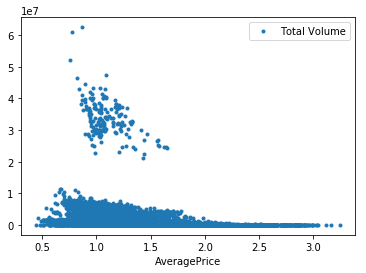

In [76]:
df.plot(x='AveragePrice', y= 'Total Volume' , style='.')

In [77]:
df['AveragePrice'].corr(df['Total Volume'])

-0.19275238715271914

In [ ]:
#Since the pearson coefficient is close to 0 there is no correlation, therefore you cannot confirm this economic principle.